# Laboratory Exercise 2 - Starter (2 points)

In this assignment, you will build a model to predict whether a customer canceled their reservation using the provided `hotel_booking.csv` dataset.

Your tasks are as follows:

1. Perform Exploratory Data Analysis (EDA) to understand the dataset.
2. Preprocess the data to prepare it for modeling.
3. Train and evaluate a machine learning model to predict  whether a customer canceled their reservation.

**Notes:**

- Some parts of the code are already provided. **Do not modify the existing code.**
- **Do not hard-code** any values or test data. There are hidden tests that will check your implementation.
- Write your solution only in the sections marked with `### YOUR SOLUTION`.
- Each task description indicates whether it is **automatically** or **manually graded**.
- You can verify automatically graded tasks using the cell labeled `### TEST` after each function.

***IMPORTANT NOTE:***
- Name your Jupyter Notebook as `lab_ex_2_{index}.ipynb`.
- For example, if your index is 123456, you should name your notebook as `lab_ex_2_12346.ipynb`.

In [228]:
import os
import hashlib
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split

In [229]:
os.environ["PYTHONHASHSEED"] = "42"
random.seed(42)
np.random.seed(42)

RANDOM_STATE = 42

In [230]:
def hash_series(series):
    series_str = ",".join(map(str, series.values))
    return hashlib.sha256(series_str.encode()).hexdigest()

In [231]:
def hash_data_frame(df):
    df_sorted = df.sort_index(axis=1).sort_values(by=list(df.columns))
    return hashlib.sha256(pd.util.hash_pandas_object(df_sorted, index=True).values).hexdigest()

In [232]:
df = pd.read_csv("hotel_bookings.csv")

In [233]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,customer_type,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,no,342,2015,July,27,1,0,0,2,...,0,C,C,3,No Deposit,NaN,NaN,Transient,0,0
1,Resort Hotel,no,737,2015,July,27,1,0,0,2,...,0,C,C,4,No Deposit,NaN,NaN,Transient,0,0
2,Resort Hotel,no,7,2015,July,27,1,0,1,1,...,0,A,C,0,No Deposit,NaN,NaN,Transient,0,0
3,Resort Hotel,no,13,2015,July,27,1,0,1,1,...,0,A,A,0,No Deposit,304.0,NaN,Transient,0,0
4,Resort Hotel,no,14,2015,July,27,1,0,2,2,...,0,A,A,0,No Deposit,240.0,NaN,Transient,0,1


In [234]:
### MANUALLY GRADED TASK
def calculate_descriptive_statistics(df):
    """
    Compute the descriptive statistics for all numeric columns in the dataset.
    The statistics should include: count, mean, standard deviation (std), minimum,
    25th percentile, median, 75th percentile, and maximum.
    
    Return the result as a `pd.DataFrame.
    """
    print(df.describe())

    # YOUR CODE HERE


In [235]:
calculate_descriptive_statistics(df)

           lead_time  arrival_date_year  arrival_date_week_number  \
count  119390.000000      119390.000000             119390.000000   
mean      104.011416        2016.156554                 27.165173   
std       106.863097           0.707476                 13.605138   
min         0.000000        2015.000000                  1.000000   
25%        18.000000        2016.000000                 16.000000   
50%        69.000000        2016.000000                 28.000000   
75%       160.000000        2017.000000                 38.000000   
max       737.000000        2017.000000                 53.000000   

       arrival_date_day_of_month  stays_in_weekend_nights  \
count              119390.000000            119390.000000   
mean                   15.798241                 0.927599   
std                     8.780829                 0.998613   
min                     1.000000                 0.000000   
25%                     8.000000                 0.000000   
50%         

In [236]:
### MANUALLY GRADED TASK
def plot_pairwise_relationships(df):
    """
    Create pairwise plots to visualize the relationships between all numerical variables
    in the dataset using scatter plots and histograms.
    """

    # YOUR CODE HERE
    plt.figure(figsize=(20,20))
    sns.pairplot(df,diag_kind='hist')
    plt.show()

<Figure size 2000x2000 with 0 Axes>

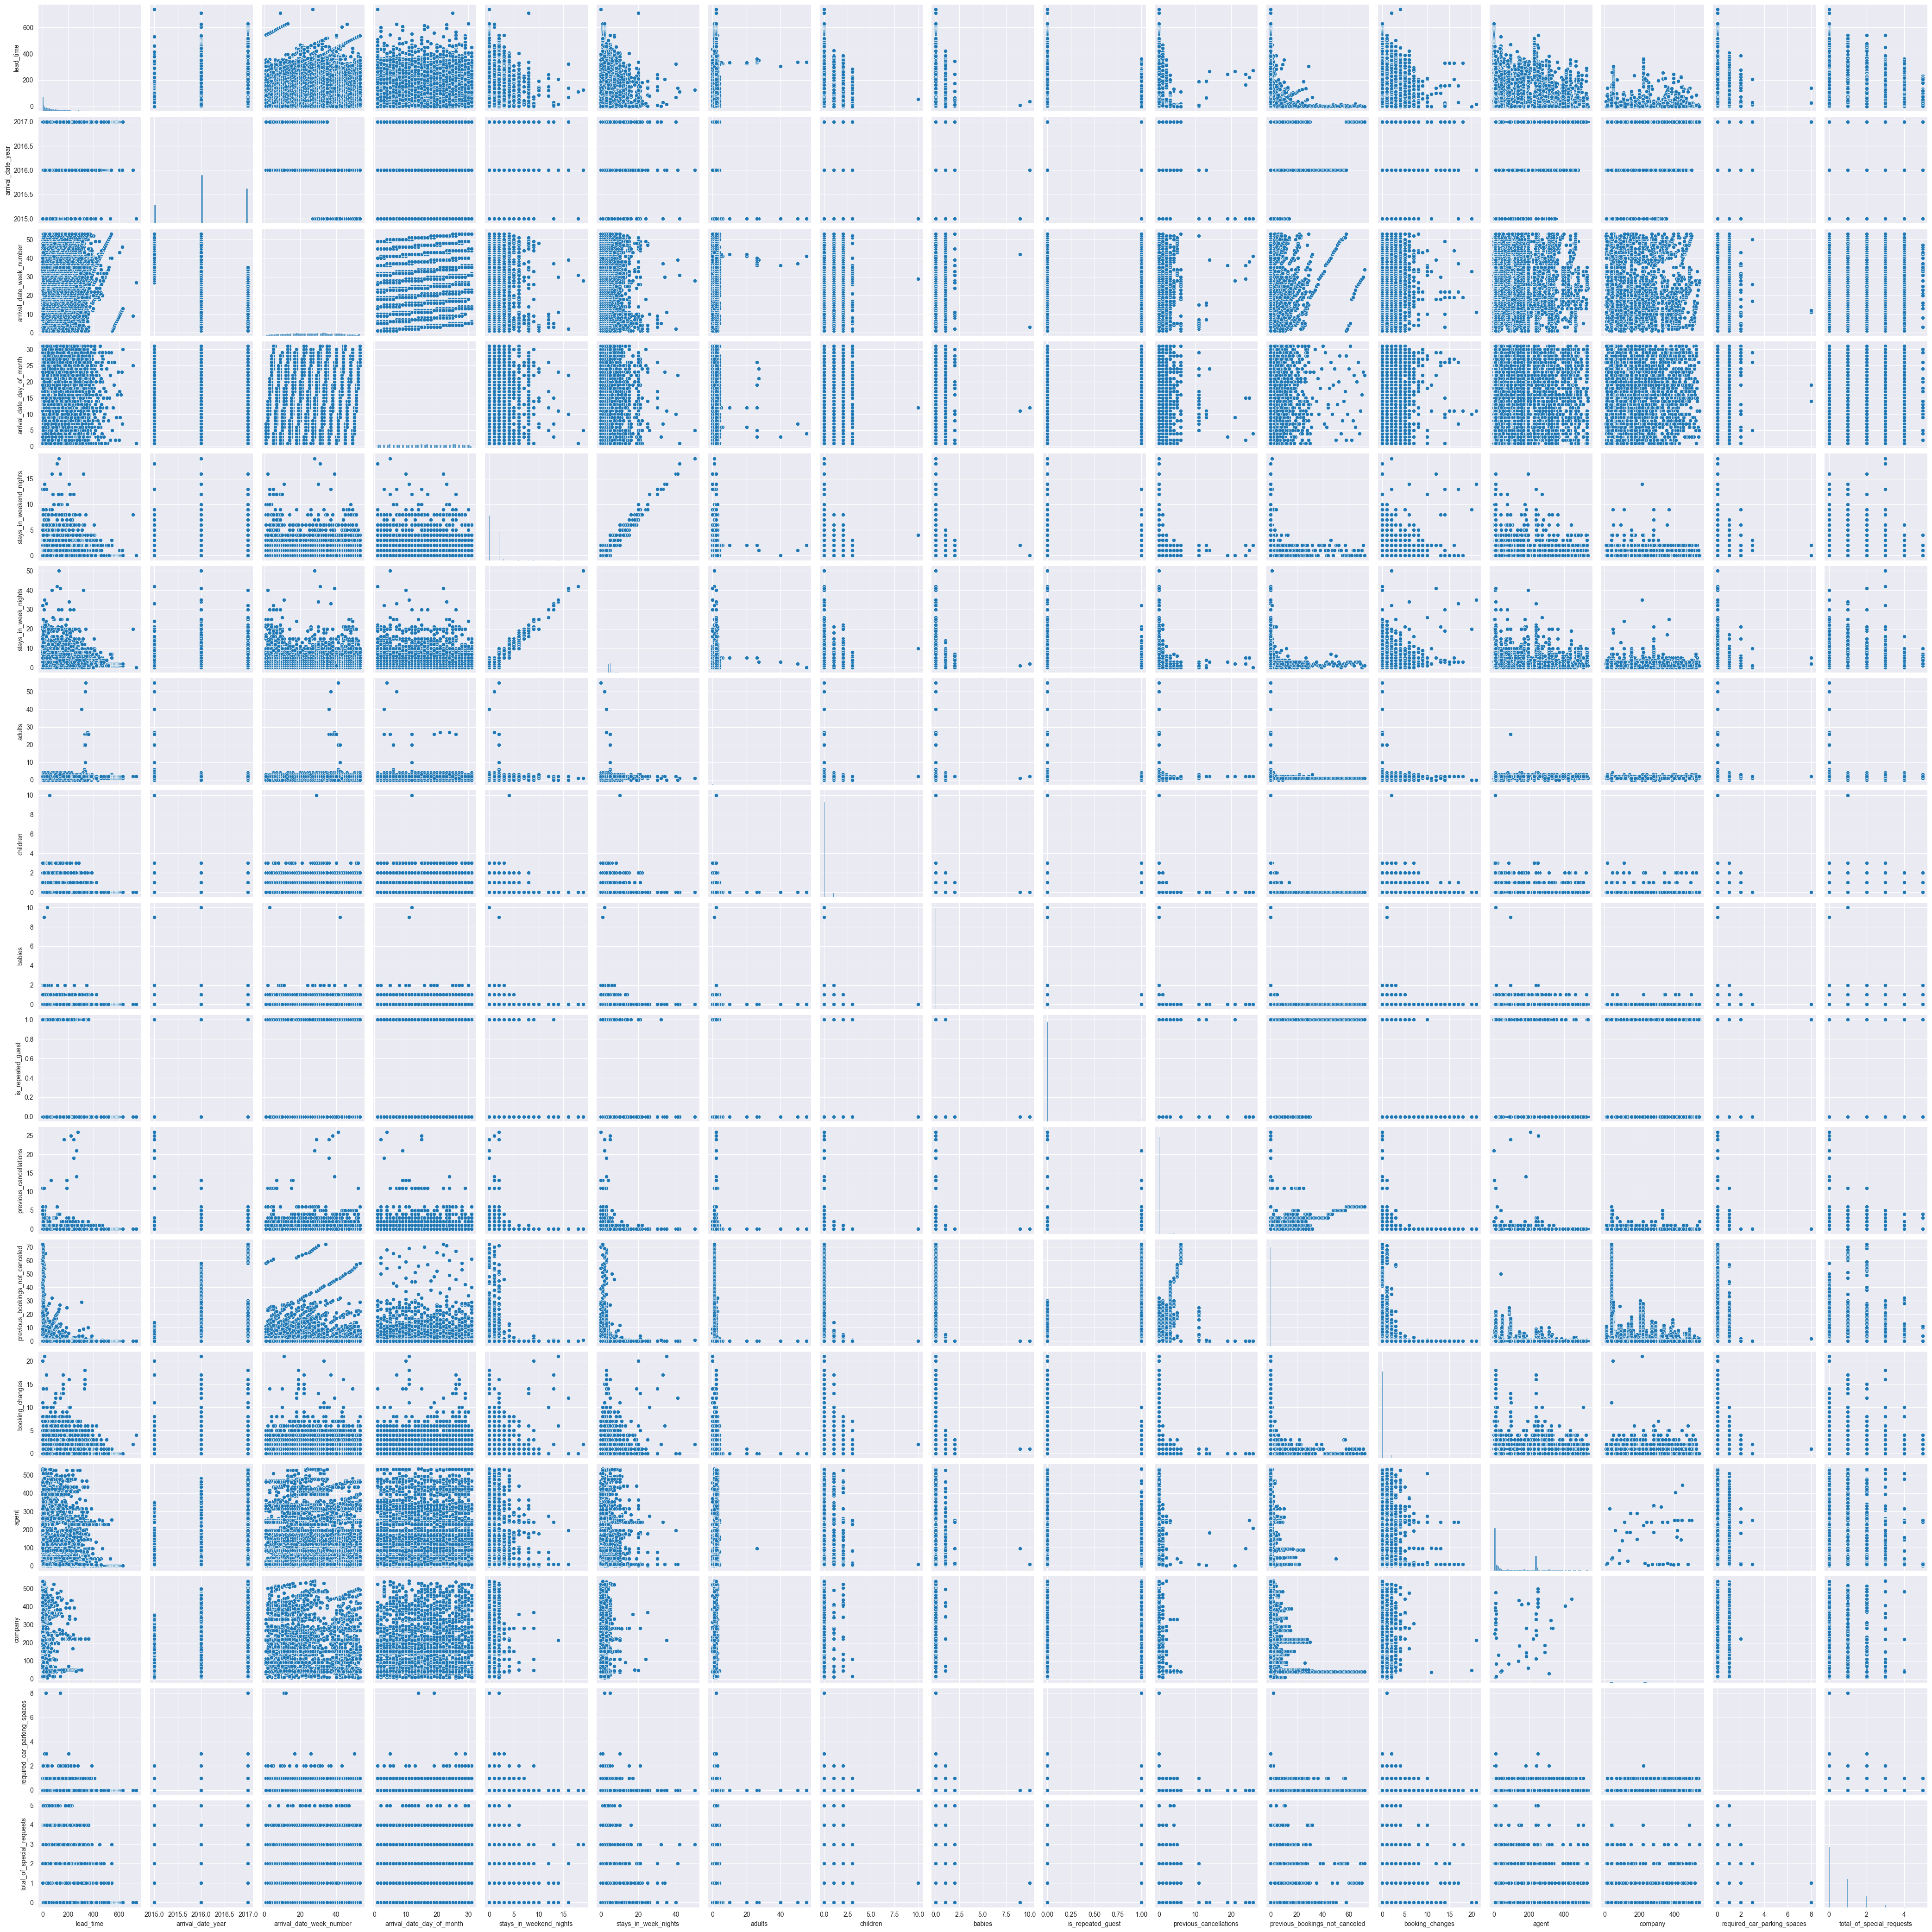

In [237]:
plot_pairwise_relationships(df)

In [238]:
### MANUALLY GRADED TASK
def plot_correlation_intensity(df):
    """
    Plot a heatmap showing the strength and direction of the Pearson correlation
    between all numeric variables in the dataset.
    """

    # YOUR CODE HERE
    plt.figure(figsize=(15, 12))
    sns.heatmap(df.corr(numeric_only=True),annot=True)
    plt.show()

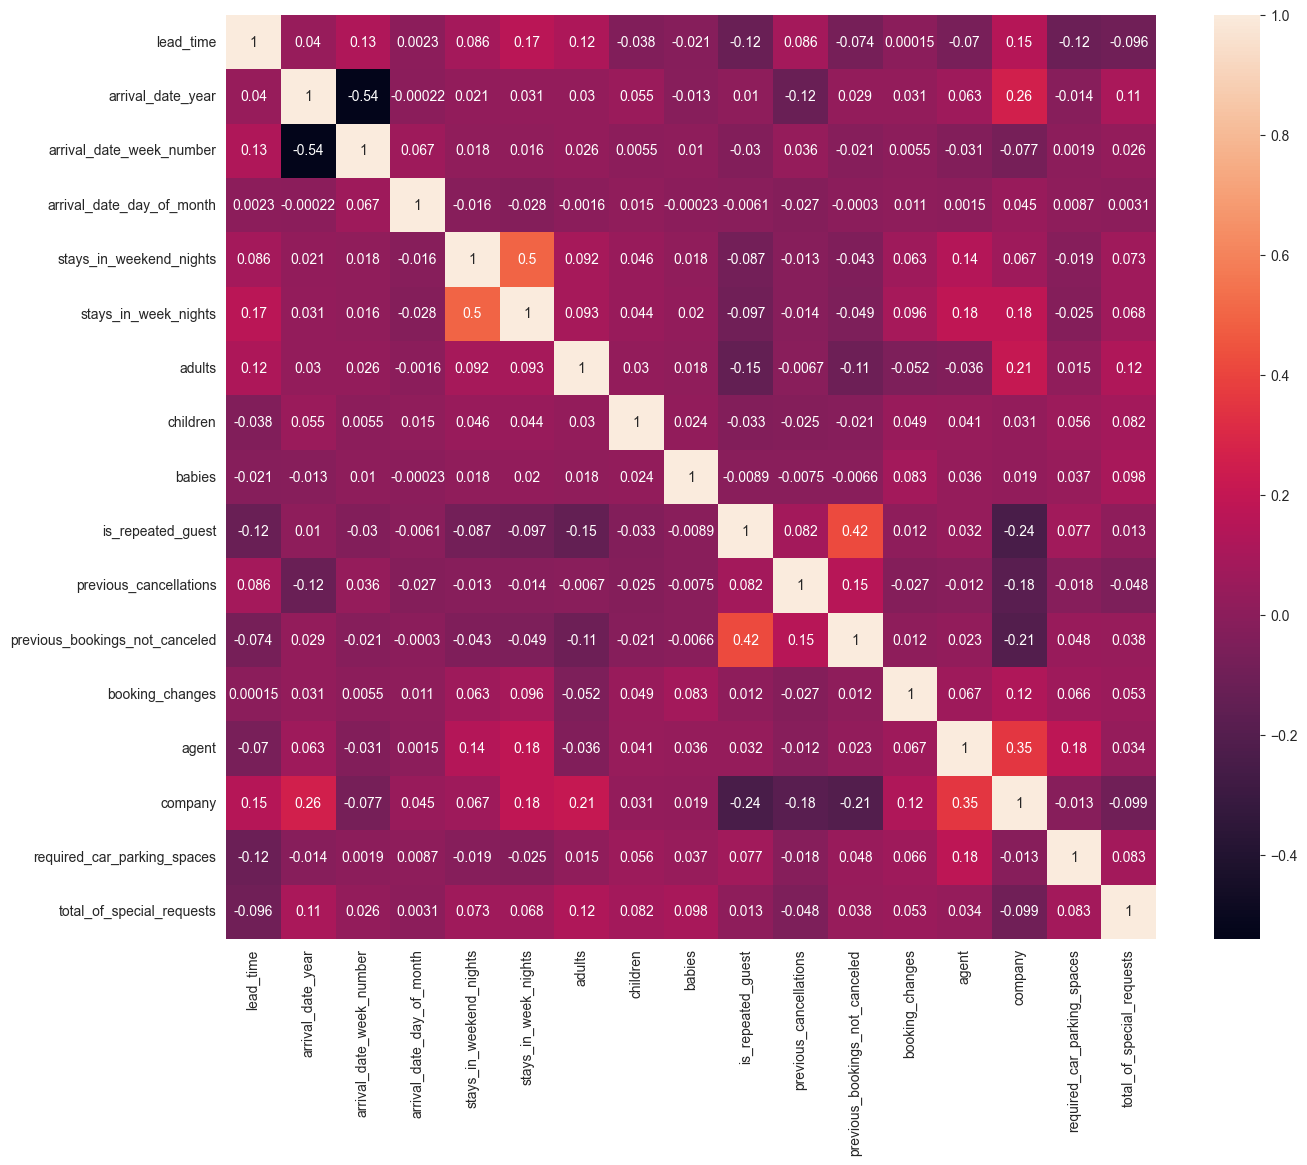

In [239]:
plot_correlation_intensity(df)

In [240]:
### MANUALLY GRADED TASK
def plot_lead_time_boxplot(df):
    """
    Create a boxplot showing how lead time differs between canceled and non-canceled bookings.
    """

    # YOUR CODE HERE
    sns.boxplot(x="lead_time",y='is_canceled',data=df)
    plt.xlabel('Lead time')
    plt.ylabel('Is canceled')
    plt.show()

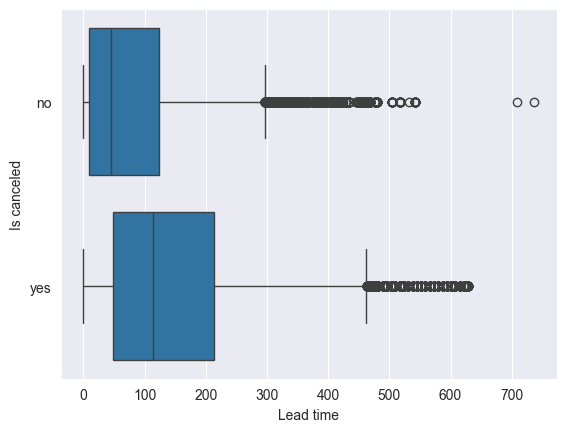

In [241]:
plot_lead_time_boxplot(df)

In [242]:
### MANUALLY GRADED TASK
def plot_cancellation_counts(df):
    """
    Create a bar plot showing how many bookings were canceled vs not canceled.
    """

    # YOUR CODE HERE
    counts_per_type=df['is_canceled'].value_counts()
    plt.bar(counts_per_type.index,counts_per_type)
    plt.show()


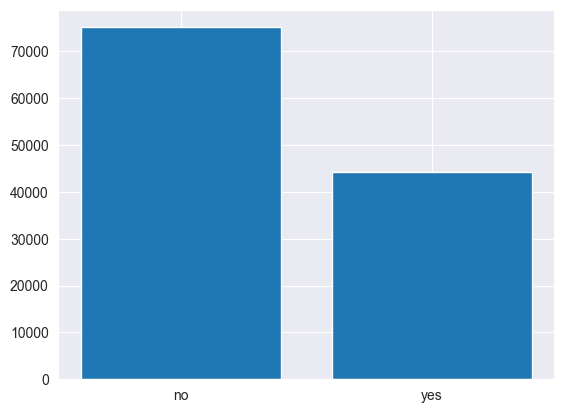

In [243]:
plot_cancellation_counts(df)

In [244]:
### AUTOMATICALLY GRADED TASK
def impute_children_mode(df):
    """
    Fill missing values in `children` with the mode. Use the fillna() method.

    Return the updated dataset as `pd.DataFrame`.
    """
    
    # YOUR CODE HERE
    df['children']=df['children'].fillna(df['children'].mode()[0])
    
    return df

In [245]:
impute_children_mode(df)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,customer_type,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,no,342,2015,July,27,1,0,0,2,...,0,C,C,3,No Deposit,NaN,NaN,Transient,0,0
1,Resort Hotel,no,737,2015,July,27,1,0,0,2,...,0,C,C,4,No Deposit,NaN,NaN,Transient,0,0
2,Resort Hotel,no,7,2015,July,27,1,0,1,1,...,0,A,C,0,No Deposit,NaN,NaN,Transient,0,0
3,Resort Hotel,no,13,2015,July,27,1,0,1,1,...,0,A,A,0,No Deposit,304.0,NaN,Transient,0,0
4,Resort Hotel,no,14,2015,July,27,1,0,2,2,...,0,A,A,0,No Deposit,240.0,NaN,Transient,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,no,23,2017,August,35,30,2,5,2,...,0,A,A,0,No Deposit,394.0,NaN,Transient,0,0
119386,City Hotel,no,102,2017,August,35,31,2,5,3,...,0,E,E,0,No Deposit,9.0,NaN,Transient,0,2
119387,City Hotel,no,34,2017,August,35,31,2,5,2,...,0,D,D,0,No Deposit,9.0,NaN,Transient,0,4
119388,City Hotel,no,109,2017,August,35,31,2,5,2,...,0,A,A,0,No Deposit,89.0,NaN,Transient,0,0


In [246]:
### TEST
_df = pd.read_csv("hotel_bookings.csv")
_df = impute_children_mode(_df)
assert hash_data_frame(_df) == "2f1c5dfe0828d78ea1a8f9c5976821a9a3eaca07cfe98326304d5972c11b361b"

In [247]:
### AUTOMATICALLY GRADED TASK
def impute_country_mode(df):
    """
    Fill missing values in `country` with the mode. Use the fillna() method.

    Return the updated dataset as `pd.DataFrame`.
    """
    
    # YOUR CODE HERE
    df['country']=df['country'].fillna(df['country'].mode()[0])
    
    return df

In [248]:
impute_country_mode(df)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,customer_type,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,no,342,2015,July,27,1,0,0,2,...,0,C,C,3,No Deposit,NaN,NaN,Transient,0,0
1,Resort Hotel,no,737,2015,July,27,1,0,0,2,...,0,C,C,4,No Deposit,NaN,NaN,Transient,0,0
2,Resort Hotel,no,7,2015,July,27,1,0,1,1,...,0,A,C,0,No Deposit,NaN,NaN,Transient,0,0
3,Resort Hotel,no,13,2015,July,27,1,0,1,1,...,0,A,A,0,No Deposit,304.0,NaN,Transient,0,0
4,Resort Hotel,no,14,2015,July,27,1,0,2,2,...,0,A,A,0,No Deposit,240.0,NaN,Transient,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,no,23,2017,August,35,30,2,5,2,...,0,A,A,0,No Deposit,394.0,NaN,Transient,0,0
119386,City Hotel,no,102,2017,August,35,31,2,5,3,...,0,E,E,0,No Deposit,9.0,NaN,Transient,0,2
119387,City Hotel,no,34,2017,August,35,31,2,5,2,...,0,D,D,0,No Deposit,9.0,NaN,Transient,0,4
119388,City Hotel,no,109,2017,August,35,31,2,5,2,...,0,A,A,0,No Deposit,89.0,NaN,Transient,0,0


In [249]:
### TEST
_df = pd.read_csv("hotel_bookings.csv")
_df = impute_country_mode(_df)
assert hash_data_frame(_df) == "528991530f1e5408a3bcbcf681a1c62189e516366e6a767ce163320e705487e5"

In [250]:
df['agent'].value_counts()

agent
9.0      31961
240.0    13922
1.0       7191
14.0      3640
7.0       3539
         ...  
197.0        1
294.0        1
388.0        1
453.0        1
480.0        1
Name: count, Length: 333, dtype: int64

In [251]:
df['agent'].isnull().sum()

np.int64(16340)

In [252]:
### MANUALLY GRADED TASK
def impute_agent_company_knn(df):
    """
    Impute missing values in `agent` and `company` using KNNImputer with the appropriate columns.
    
    Note: The imputed values should be converted to integer.

    Return the updated dataset as `pd.DataFrame`.
    """
    
    # YOUR CODE HERE
    df.drop(columns=['company'],inplace=True)
    knn_imputer = KNNImputer(n_neighbors=5)
    imputed_data = knn_imputer.fit_transform(df[['agent']])
    df['agent']=imputed_data.astype(int)
    return df


In [253]:
impute_agent_company_knn(df)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,customer_type,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,no,342,2015,July,27,1,0,0,2,...,0,0,C,C,3,No Deposit,86,Transient,0,0
1,Resort Hotel,no,737,2015,July,27,1,0,0,2,...,0,0,C,C,4,No Deposit,86,Transient,0,0
2,Resort Hotel,no,7,2015,July,27,1,0,1,1,...,0,0,A,C,0,No Deposit,86,Transient,0,0
3,Resort Hotel,no,13,2015,July,27,1,0,1,1,...,0,0,A,A,0,No Deposit,304,Transient,0,0
4,Resort Hotel,no,14,2015,July,27,1,0,2,2,...,0,0,A,A,0,No Deposit,240,Transient,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,no,23,2017,August,35,30,2,5,2,...,0,0,A,A,0,No Deposit,394,Transient,0,0
119386,City Hotel,no,102,2017,August,35,31,2,5,3,...,0,0,E,E,0,No Deposit,9,Transient,0,2
119387,City Hotel,no,34,2017,August,35,31,2,5,2,...,0,0,D,D,0,No Deposit,9,Transient,0,4
119388,City Hotel,no,109,2017,August,35,31,2,5,2,...,0,0,A,A,0,No Deposit,89,Transient,0,0


In [254]:
df['hotel'].value_counts()

hotel
City Hotel      79330
Resort Hotel    40060
Name: count, dtype: int64

In [255]:
### AUTOMATICALLY GRADED TASK
def encode_or_drop_hotel(df):
    """
    Encode the `hotel` variable or remove it from the dataset.

    Note: If you plan to perform one-hot encoding, use the `pd.get_dummies` function and
    append the new columns to the dataset. Also, remove the original column.
    
    Return the updated dataset as `pd.DataFrame`.
    """

    # YOUR CODE HERE
    df.drop(columns=['hotel'],inplace=True)
    
    return df

In [256]:
encode_or_drop_hotel(df)

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,customer_type,required_car_parking_spaces,total_of_special_requests
0,no,342,2015,July,27,1,0,0,2,0.0,...,0,0,C,C,3,No Deposit,86,Transient,0,0
1,no,737,2015,July,27,1,0,0,2,0.0,...,0,0,C,C,4,No Deposit,86,Transient,0,0
2,no,7,2015,July,27,1,0,1,1,0.0,...,0,0,A,C,0,No Deposit,86,Transient,0,0
3,no,13,2015,July,27,1,0,1,1,0.0,...,0,0,A,A,0,No Deposit,304,Transient,0,0
4,no,14,2015,July,27,1,0,2,2,0.0,...,0,0,A,A,0,No Deposit,240,Transient,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,no,23,2017,August,35,30,2,5,2,0.0,...,0,0,A,A,0,No Deposit,394,Transient,0,0
119386,no,102,2017,August,35,31,2,5,3,0.0,...,0,0,E,E,0,No Deposit,9,Transient,0,2
119387,no,34,2017,August,35,31,2,5,2,0.0,...,0,0,D,D,0,No Deposit,9,Transient,0,4
119388,no,109,2017,August,35,31,2,5,2,0.0,...,0,0,A,A,0,No Deposit,89,Transient,0,0


In [257]:
### TEST
_df = pd.read_csv("hotel_bookings.csv")
_df = encode_or_drop_hotel(_df)
assert hash_data_frame(_df) == "ddfef26391e08ec0e788486481c885ebeecda826fa125e665e4eeea6096b91c9"

In [258]:
### AUTOMATICALLY GRADED TASK
def encode_is_canceled(df):
    """
    Encode the `is_canceled` column manually:
    - "no"  -> 0
    - "yes" -> 1
    
    Return the updated dataset as `pd.DataFrame`.
    """

    # YOUR CODE HERE
    df['is_canceled']=df['is_canceled'].apply(lambda x: 1 if x=='yes' else 0)

    return df

In [259]:
encode_is_canceled(df)

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,customer_type,required_car_parking_spaces,total_of_special_requests
0,0,342,2015,July,27,1,0,0,2,0.0,...,0,0,C,C,3,No Deposit,86,Transient,0,0
1,0,737,2015,July,27,1,0,0,2,0.0,...,0,0,C,C,4,No Deposit,86,Transient,0,0
2,0,7,2015,July,27,1,0,1,1,0.0,...,0,0,A,C,0,No Deposit,86,Transient,0,0
3,0,13,2015,July,27,1,0,1,1,0.0,...,0,0,A,A,0,No Deposit,304,Transient,0,0
4,0,14,2015,July,27,1,0,2,2,0.0,...,0,0,A,A,0,No Deposit,240,Transient,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,August,35,30,2,5,2,0.0,...,0,0,A,A,0,No Deposit,394,Transient,0,0
119386,0,102,2017,August,35,31,2,5,3,0.0,...,0,0,E,E,0,No Deposit,9,Transient,0,2
119387,0,34,2017,August,35,31,2,5,2,0.0,...,0,0,D,D,0,No Deposit,9,Transient,0,4
119388,0,109,2017,August,35,31,2,5,2,0.0,...,0,0,A,A,0,No Deposit,89,Transient,0,0


In [260]:
### TEST
_df = pd.read_csv("hotel_bookings.csv")
_df = encode_is_canceled(_df)
assert hash_data_frame(_df) == "bd5c6cf86d2ef9dc64162cb8d9d8be54b1247e6a0da08074085d6c4bf86b71df"

In [261]:
### AUTOMATICALLY GRADED TASK
def encode_arrival_date_month(df):
    """
    Encode the `arrival_date_month` column using OrdinalEncoder
    with fixed calendar order (January → December).

    Note: The encoded values should be converted to integer.

    Return the updated dataset as `pd.DataFrame`.
    """
    
    # YOUR CODE HERE
    ordinal_encoder = OrdinalEncoder(categories=[["January", "February", "March", "April",
                                                  "May", "June", "July", "August", "September",
                                                  "October", "November", "December"]])
    encoded_vals=ordinal_encoder.fit_transform(df[['arrival_date_month']])
    df["arrival_date_month"] = encoded_vals.astype(int)

    return df


In [262]:
encode_arrival_date_month(df)

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,customer_type,required_car_parking_spaces,total_of_special_requests
0,0,342,2015,6,27,1,0,0,2,0.0,...,0,0,C,C,3,No Deposit,86,Transient,0,0
1,0,737,2015,6,27,1,0,0,2,0.0,...,0,0,C,C,4,No Deposit,86,Transient,0,0
2,0,7,2015,6,27,1,0,1,1,0.0,...,0,0,A,C,0,No Deposit,86,Transient,0,0
3,0,13,2015,6,27,1,0,1,1,0.0,...,0,0,A,A,0,No Deposit,304,Transient,0,0
4,0,14,2015,6,27,1,0,2,2,0.0,...,0,0,A,A,0,No Deposit,240,Transient,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,7,35,30,2,5,2,0.0,...,0,0,A,A,0,No Deposit,394,Transient,0,0
119386,0,102,2017,7,35,31,2,5,3,0.0,...,0,0,E,E,0,No Deposit,9,Transient,0,2
119387,0,34,2017,7,35,31,2,5,2,0.0,...,0,0,D,D,0,No Deposit,9,Transient,0,4
119388,0,109,2017,7,35,31,2,5,2,0.0,...,0,0,A,A,0,No Deposit,89,Transient,0,0


In [263]:
### TEST
_df = pd.read_csv("hotel_bookings.csv")
_df = encode_arrival_date_month(_df)
assert hash_data_frame(_df) == "5def409216f31ceb05b96377d444141c7e28cfca808a8481484ab0443a873c99"

In [264]:
df['meal'].isna().sum()

np.int64(0)

In [265]:
### AUTOMATICALLY GRADED TASK
def encode_or_drop_meal(df):
    """
    Encode the `meal` variable or remove it from the dataset.

    Note: If you plan to encode it use OrdinalEncoder with automatically detected categories. 
    The encoded values should be converted to integer.
    
    Return the updated dataset as `pd.DataFrame`.
    """

    # YOUR CODE HERE
    ordinal_encoder = OrdinalEncoder(categories="auto")
    encoded_values = ordinal_encoder.fit_transform(df[["meal"]])
    df['meal']=encoded_values.astype(int)

    return df

In [266]:
encode_or_drop_meal(df)

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,customer_type,required_car_parking_spaces,total_of_special_requests
0,0,342,2015,6,27,1,0,0,2,0.0,...,0,0,C,C,3,No Deposit,86,Transient,0,0
1,0,737,2015,6,27,1,0,0,2,0.0,...,0,0,C,C,4,No Deposit,86,Transient,0,0
2,0,7,2015,6,27,1,0,1,1,0.0,...,0,0,A,C,0,No Deposit,86,Transient,0,0
3,0,13,2015,6,27,1,0,1,1,0.0,...,0,0,A,A,0,No Deposit,304,Transient,0,0
4,0,14,2015,6,27,1,0,2,2,0.0,...,0,0,A,A,0,No Deposit,240,Transient,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,7,35,30,2,5,2,0.0,...,0,0,A,A,0,No Deposit,394,Transient,0,0
119386,0,102,2017,7,35,31,2,5,3,0.0,...,0,0,E,E,0,No Deposit,9,Transient,0,2
119387,0,34,2017,7,35,31,2,5,2,0.0,...,0,0,D,D,0,No Deposit,9,Transient,0,4
119388,0,109,2017,7,35,31,2,5,2,0.0,...,0,0,A,A,0,No Deposit,89,Transient,0,0


In [267]:
### TEST
_df = pd.read_csv("hotel_bookings.csv")
_df = encode_or_drop_meal(_df)
assert hash_data_frame(_df) == "1c7fbbbcd1b083a264a946bce4188949dd3d27882ce357b27e5ecddee7c3c3e2"

In [268]:
df['country'].isna().sum()

np.int64(0)

In [269]:
### AUTOMATICALLY GRADED TASK
def encode_or_drop_country(df):
    """
    Encode the `country` variable or remove it from the dataset.

    Note: If you plan to encode it use OrdinalEncoder with automatically detected categories. 
    The encoded values should be converted to integer.
    
    Return the updated dataset as `pd.DataFrame`.
    """

    # YOUR CODE HERE
    df.drop(columns=['country'],inplace=True)

    return df

In [270]:
encode_or_drop_country(df)

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,customer_type,required_car_parking_spaces,total_of_special_requests
0,0,342,2015,6,27,1,0,0,2,0.0,...,0,0,C,C,3,No Deposit,86,Transient,0,0
1,0,737,2015,6,27,1,0,0,2,0.0,...,0,0,C,C,4,No Deposit,86,Transient,0,0
2,0,7,2015,6,27,1,0,1,1,0.0,...,0,0,A,C,0,No Deposit,86,Transient,0,0
3,0,13,2015,6,27,1,0,1,1,0.0,...,0,0,A,A,0,No Deposit,304,Transient,0,0
4,0,14,2015,6,27,1,0,2,2,0.0,...,0,0,A,A,0,No Deposit,240,Transient,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,7,35,30,2,5,2,0.0,...,0,0,A,A,0,No Deposit,394,Transient,0,0
119386,0,102,2017,7,35,31,2,5,3,0.0,...,0,0,E,E,0,No Deposit,9,Transient,0,2
119387,0,34,2017,7,35,31,2,5,2,0.0,...,0,0,D,D,0,No Deposit,9,Transient,0,4
119388,0,109,2017,7,35,31,2,5,2,0.0,...,0,0,A,A,0,No Deposit,89,Transient,0,0


In [271]:
### TEST
_df = pd.read_csv("hotel_bookings.csv")
_df = encode_or_drop_country(_df)
print(hash_data_frame(_df))
assert hash_data_frame(_df) == "be2489fa971ddb0bd4043d782985f94e0f65949922867165b475fb553138ce56"

be2489fa971ddb0bd4043d782985f94e0f65949922867165b475fb553138ce56


In [272]:
df['customer_type'].isna().sum()

np.int64(0)

In [273]:
### AUTOMATICALLY GRADED TASK
def encode_or_drop_customer_type(df):
    """
    Encode the `customer_type` variable or remove it from the dataset.

    Note: If you plan to encode it use OrdinalEncoder with automatically detected categories. 
    The encoded values should be converted to integer.
    
    Return the updated dataset as `pd.DataFrame`.
    """

    # YOUR CODE HERE
    ordinal_encoder = OrdinalEncoder(categories="auto")
    encoded_values = ordinal_encoder.fit_transform(df[["customer_type"]])
    df['customer_type']=encoded_values.astype(int)

    return df

In [274]:
encode_or_drop_customer_type(df)

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,customer_type,required_car_parking_spaces,total_of_special_requests
0,0,342,2015,6,27,1,0,0,2,0.0,...,0,0,C,C,3,No Deposit,86,2,0,0
1,0,737,2015,6,27,1,0,0,2,0.0,...,0,0,C,C,4,No Deposit,86,2,0,0
2,0,7,2015,6,27,1,0,1,1,0.0,...,0,0,A,C,0,No Deposit,86,2,0,0
3,0,13,2015,6,27,1,0,1,1,0.0,...,0,0,A,A,0,No Deposit,304,2,0,0
4,0,14,2015,6,27,1,0,2,2,0.0,...,0,0,A,A,0,No Deposit,240,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,7,35,30,2,5,2,0.0,...,0,0,A,A,0,No Deposit,394,2,0,0
119386,0,102,2017,7,35,31,2,5,3,0.0,...,0,0,E,E,0,No Deposit,9,2,0,2
119387,0,34,2017,7,35,31,2,5,2,0.0,...,0,0,D,D,0,No Deposit,9,2,0,4
119388,0,109,2017,7,35,31,2,5,2,0.0,...,0,0,A,A,0,No Deposit,89,2,0,0


In [275]:
### TEST
_df = pd.read_csv("hotel_bookings.csv")
_df = encode_or_drop_customer_type(_df)
assert hash_data_frame(_df) == "6c55892a0f98882ac8720b5ec0350a71cfb936ebcde9472c604ce364ce1da6a5"

In [276]:
### AUTOMATICALLY GRADED TASK
def encode_deposit_type(df):
    """
    Encode the `deposit_type` column using OrdinalEncoder
    with fixed order ['No Deposit', 'Non Refund', 'Refundable'].

    Note: The encoded values should be converted to integer.

    Return the updated dataset as `pd.DataFrame`.
    """
    
    # YOUR CODE HERE
    ordinal_encoder = OrdinalEncoder(categories=[['No Deposit', 'Non Refund', 'Refundable']])
    encoded_values = ordinal_encoder.fit_transform(df[["deposit_type"]])
    df['deposit_type']=encoded_values.astype(int)

    return df

In [277]:
encode_deposit_type(df)

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,customer_type,required_car_parking_spaces,total_of_special_requests
0,0,342,2015,6,27,1,0,0,2,0.0,...,0,0,C,C,3,0,86,2,0,0
1,0,737,2015,6,27,1,0,0,2,0.0,...,0,0,C,C,4,0,86,2,0,0
2,0,7,2015,6,27,1,0,1,1,0.0,...,0,0,A,C,0,0,86,2,0,0
3,0,13,2015,6,27,1,0,1,1,0.0,...,0,0,A,A,0,0,304,2,0,0
4,0,14,2015,6,27,1,0,2,2,0.0,...,0,0,A,A,0,0,240,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,7,35,30,2,5,2,0.0,...,0,0,A,A,0,0,394,2,0,0
119386,0,102,2017,7,35,31,2,5,3,0.0,...,0,0,E,E,0,0,9,2,0,2
119387,0,34,2017,7,35,31,2,5,2,0.0,...,0,0,D,D,0,0,9,2,0,4
119388,0,109,2017,7,35,31,2,5,2,0.0,...,0,0,A,A,0,0,89,2,0,0


In [278]:
### TEST
_df = pd.read_csv("hotel_bookings.csv")
_df = encode_deposit_type(_df)
assert hash_data_frame(_df) == "d580508ad442d05888f34e34be95f40be99758e97d57cf98bc5085ff48df32ba"

In [279]:
### AUTOMATICALLY GRADED TASK
def combine_person_columns(df):
    """
    Create a new column 'total_persons' as the sum of 'adults', 'children', and 'babies'.
    Then drop the original three columns.

    Return the updated dataset as `pd.DataFrame`.
    """
    
    # YOUR CODE HERE
    df['total_persons']=df['adults']+df['children']+df['babies']
    df = df.drop(columns=['adults', 'children', 'babies'])

    return df

In [280]:
combine_person_columns(df)

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,meal,is_repeated_guest,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,customer_type,required_car_parking_spaces,total_of_special_requests,total_persons
0,0,342,2015,6,27,1,0,0,0,0,...,0,C,C,3,0,86,2,0,0,2.0
1,0,737,2015,6,27,1,0,0,0,0,...,0,C,C,4,0,86,2,0,0,2.0
2,0,7,2015,6,27,1,0,1,0,0,...,0,A,C,0,0,86,2,0,0,1.0
3,0,13,2015,6,27,1,0,1,0,0,...,0,A,A,0,0,304,2,0,0,1.0
4,0,14,2015,6,27,1,0,2,0,0,...,0,A,A,0,0,240,2,0,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,7,35,30,2,5,0,0,...,0,A,A,0,0,394,2,0,0,2.0
119386,0,102,2017,7,35,31,2,5,0,0,...,0,E,E,0,0,9,2,0,2,3.0
119387,0,34,2017,7,35,31,2,5,0,0,...,0,D,D,0,0,9,2,0,4,2.0
119388,0,109,2017,7,35,31,2,5,0,0,...,0,A,A,0,0,89,2,0,0,2.0


In [281]:
### TEST
_df = pd.read_csv("hotel_bookings.csv")
_df = combine_person_columns(_df)
assert hash_data_frame(_df) == "f0d93e268feae1e4416b8f414b214844f2f265115d1a6a9c867586278d94b859"

In [282]:
### AUTOMATICALLY GRADED TASK
def create_room_match_column(df):
    """
    Create a new Boolean column 'room_match' that indicates whether
    the reserved room type matches the assigned room type.
    Then drop the original two columns.

    Return the updated DataFrame.
    """
    # YOUR CODE HERE
    df['room_match']=(df['reserved_room_type'] == df['assigned_room_type'])
    df.drop(columns=['reserved_room_type','assigned_room_type'],inplace=True)


    return df


In [283]:
create_room_match_column(df)

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,customer_type,required_car_parking_spaces,total_of_special_requests,total_persons,room_match
0,0,342,2015,6,27,1,0,0,2,0.0,...,0,0,3,0,86,2,0,0,2.0,True
1,0,737,2015,6,27,1,0,0,2,0.0,...,0,0,4,0,86,2,0,0,2.0,True
2,0,7,2015,6,27,1,0,1,1,0.0,...,0,0,0,0,86,2,0,0,1.0,False
3,0,13,2015,6,27,1,0,1,1,0.0,...,0,0,0,0,304,2,0,0,1.0,True
4,0,14,2015,6,27,1,0,2,2,0.0,...,0,0,0,0,240,2,0,1,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,7,35,30,2,5,2,0.0,...,0,0,0,0,394,2,0,0,2.0,True
119386,0,102,2017,7,35,31,2,5,3,0.0,...,0,0,0,0,9,2,0,2,3.0,True
119387,0,34,2017,7,35,31,2,5,2,0.0,...,0,0,0,0,9,2,0,4,2.0,True
119388,0,109,2017,7,35,31,2,5,2,0.0,...,0,0,0,0,89,2,0,0,2.0,True


In [284]:
### TEST
_df = pd.read_csv("hotel_bookings.csv")
_df = create_room_match_column(_df)
assert hash_data_frame(_df) == "4d99349e3d7901bb36e2752e8eb34a42d9a84fc4dba6dec68f6435111985efef"

In [285]:
### AUTOMATICALLY GRADED TASK
def partition_dataset(df):
    """
    Split the dataset into features (X) and target (y), where the target is `Price (Euro)`.
    Then, divide X and y into training and test sets using an 80:20 ratio.

    Use `random_state=RANDOM_STATE` to ensure reproducibility.
    
    Return the sets in the following order: train_X, test_X, train_y, test_y.
    """

    # YOUR CODE HERE
    X,y=df.drop(columns=['is_canceled']),df['is_canceled']
    train_X, test_X, train_y, test_y=train_test_split(X,y,test_size=0.2,random_state=RANDOM_STATE)
    
    return train_X, test_X, train_y, test_y

In [286]:
train_X, test_X, train_y, test_y = partition_dataset(df)

In [287]:
_df = pd.read_csv("hotel_bookings.csv")
_train_X, _test_X, _train_y, _test_y = partition_dataset(_df)
assert hash_data_frame(_train_X) == "9ac702152f9fbb53b83066adf10226413d2e61a67941fa6297335ef1912e0523"
assert hash_data_frame(_test_X) == "2f646b11dd0038298d3c0e990a795266f1deb2efa996ab2eb5fa40a833167b79"
assert hash_series(_train_y) == "97d345bcc07a58c45d8353e65862fb370191c4b7e6c9dd9c99eb3423f943977f"
assert hash_series(_test_y) == "a043cd1df6fd8349f79098436bdc8ccd4df94ae494784fab62a4716044dbea53"

In [305]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


### MANUALLY GRADED TASK
def fit_model(train_X, train_y):
    """
    Train a suitable model.
    
    Return the trained model.
    """


    # model=LogisticRegression(random_state=RANDOM_STATE,max_iter=1000)
    # model.fit(train_X,train_y)

    model = RandomForestClassifier(n_estimators=100, random_state=RANDOM_STATE)
    model.fit(train_X, train_y)
    
    return model

In [306]:
model = fit_model(train_X, train_y)

In [290]:
df['is_canceled'].value_counts()

is_canceled
0    75166
1    44224
Name: count, dtype: int64

In [308]:
pred_y = model.predict(test_X)

In [309]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score, \
    mean_absolute_percentage_error, accuracy_score, precision_score, recall_score, f1_score


### MANUALLY GRADED TASK
def evaluate_model(test_y, pred_y):
    """
    Evaluate the model's predictions using different metrics.
    
    Print the results.
    """

    #Classification metrics
    print(f"Accuracy: {accuracy_score(test_y, pred_y)}")
    print(f"Precision: {precision_score(test_y, pred_y)}")
    print(f"Recall: {recall_score(test_y, pred_y)}")
    print(f"F1-Score: {f1_score(test_y, pred_y)}")


    #Regression metrics
    # print(f"MAE: {mean_absolute_error(test_y, pred_y)}")
    # print(f"MAPE: {mean_absolute_percentage_error(test_y, pred_y)}")
    # print(f"MSE: {mean_squared_error(test_y, pred_y)}")
    # print(f"RMSE: {root_mean_squared_error(test_y, pred_y)}")
    # print(f"R2 Score: {r2_score(test_y, pred_y)}")
    # YOUR CODE HERE


In [310]:
evaluate_model(test_y, pred_y)

Accuracy: 0.8714297679872686
Precision: 0.8725849223386791
Recall: 0.7702597257830788
F1-Score: 0.8182356423919479
